In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
marathon = pd.read_csv("../course-files/marathon_results_2017.csv", usecols=["Age","M/F","Country","40K"])
marathon["TimeSeconds"] = marathon["40K"].apply(lambda x: pd.Timedelta(x).total_seconds())
groupMF = marathon[ marathon["Country"].isin(["USA","CAN"]) ].groupby(by=["Country","M/F"])
groupMF = groupMF.agg({"TimeSeconds": ["mean"]})
groupMF = groupMF.unstack()
groupMF.columns = groupMF.columns.droplevel().droplevel()
groupMF

M/F,F,M
Country,,
CAN,13618.346012,12527.160190
USA,14187.362706,12998.130515


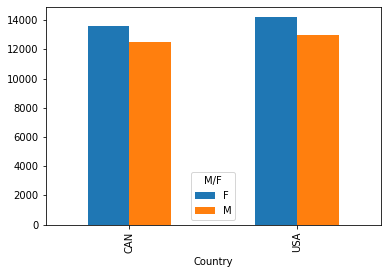

In [5]:
groupMF.plot(kind='bar')

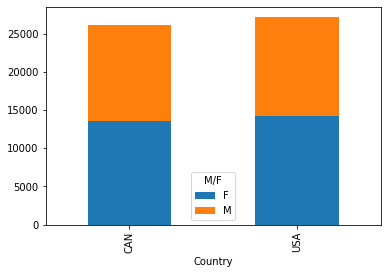

In [6]:
groupMF.plot(kind='bar', stacked=True)

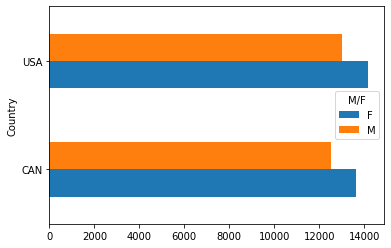

In [7]:
groupMF.plot(kind='barh')

In [8]:
age_data = marathon[ marathon["Country"].isin(["USA"]) ]
age_data.head()

,Age,M/F,Country,40K,TimeSeconds
1,30,M,USA,2:03:14,7394.0
3,32,M,USA,2:04:35,7475.0
5,40,M,USA,2:05:21,7521.0
6,33,M,USA,2:05:41,7541.0
8,27,M,USA,2:07:17,7637.0


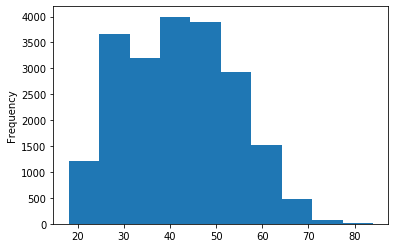

In [9]:
age_data['Age'].plot(kind='hist')

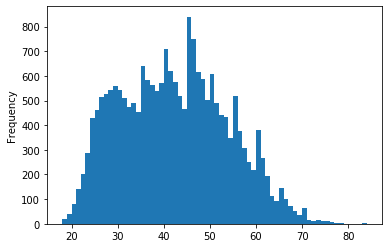

In [10]:
age_data['Age'].plot(kind='hist', bins=age_data['Age'].nunique())

In [11]:
data_USA = marathon[ marathon["Country"].isin(["USA"]) ]
data_USA.head()

,Age,M/F,Country,40K,TimeSeconds
1,30,M,USA,2:03:14,7394.0
3,32,M,USA,2:04:35,7475.0
5,40,M,USA,2:05:21,7521.0
6,33,M,USA,2:05:41,7541.0
8,27,M,USA,2:07:17,7637.0


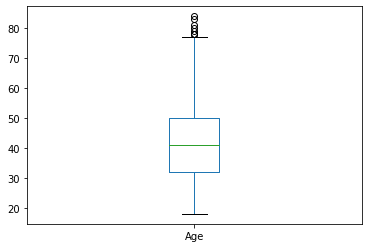

In [12]:
data_USA['Age'].plot(kind='box')

In [13]:
USA = marathon[ marathon["Country"].isin(["USA"]) ]["Age"]
CAN = marathon[ marathon["Country"].isin(["CAN"]) ]["Age"]
df = pd.DataFrame({'USA':USA, 'CAN':CAN})
df.head()

,USA,CAN
1,30.0,NaN
3,32.0,NaN
5,40.0,NaN
6,33.0,NaN
8,27.0,NaN


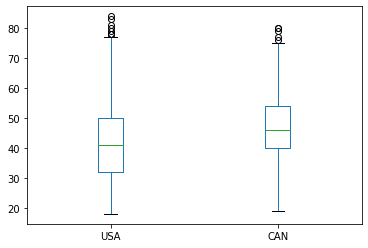

In [14]:
df.plot(kind='box')

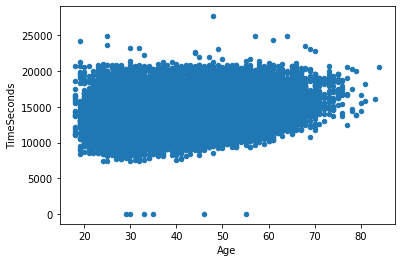

In [18]:
marathon.plot.scatter(x='Age', y='TimeSeconds')

In [20]:
marathon.head()

,Age,M/F,Country,40K,TimeSeconds
0,24,M,KEN,2:02:53,7373.0
1,30,M,USA,2:03:14,7394.0
2,25,M,JPN,2:03:38,7418.0
3,32,M,USA,2:04:35,7475.0
4,31,M,KEN,2:05:00,7500.0


In [22]:
marathon_m = marathon.loc[marathon['M/F']=='M']
marathon_w = marathon.loc[marathon['M/F']=='F']

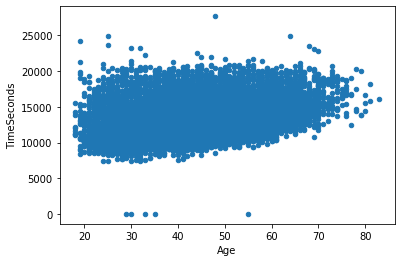

In [23]:
ax = marathon_m.plot.scatter(x='Age', y='TimeSeconds')

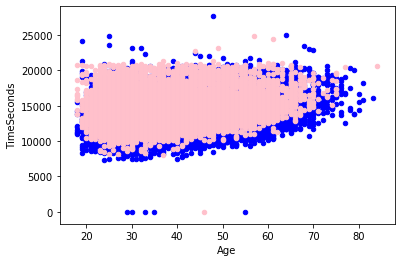

In [25]:
ax = marathon_m.plot.scatter(x='Age', y='TimeSeconds', color='Blue')
marathon_w.plot.scatter(x='Age', y='TimeSeconds',color='Pink', ax=ax)

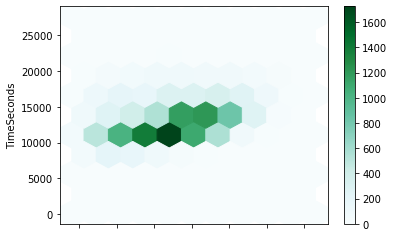

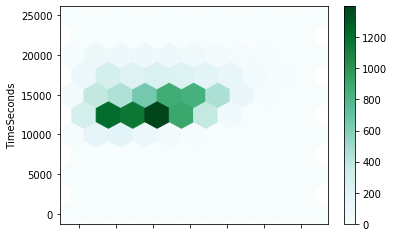

In [28]:
marathon_m.plot.hexbin(x='Age', y='TimeSeconds', gridsize=10, )
marathon_w.plot.hexbin(x='Age', y='TimeSeconds', gridsize=10)